# Визуализация, oптимальное число кластеров

## 1 Визуализация

Для визуализации данных о пользователях сервиса построим график методом pairplot (англ. «парный график») из библиотеки ```seaborn```.

На диагонали находится распределение признака: ```purchase```, ```timespent``` и ```months```. В других ячейках — диаграммы рассеяния между всеми парами признаков. Тип графика по диагонали определяется параметром ```diag_kind```.

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [12]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/segments.csv')

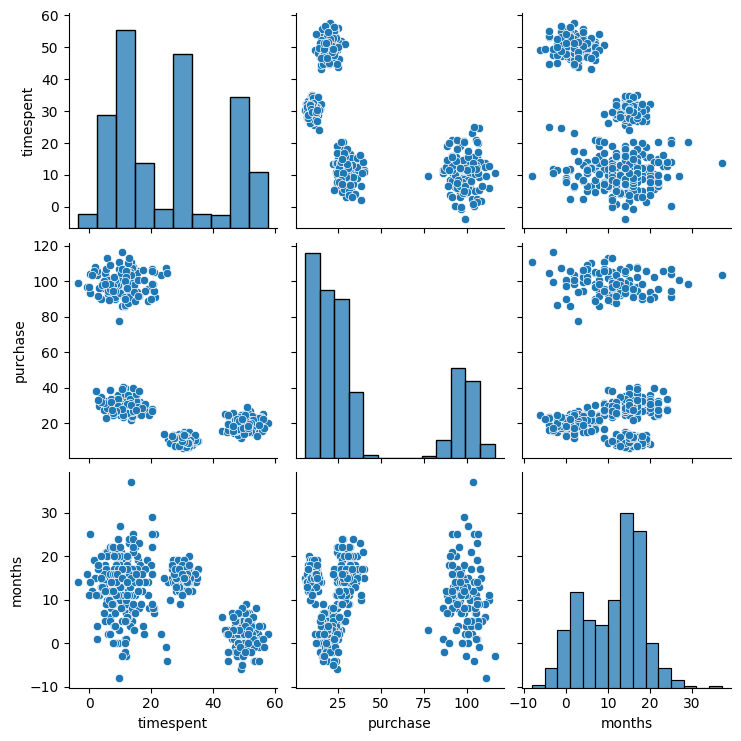

In [13]:
sns.pairplot(data, diag_kind='hist');

#### Обучите модель с начальными центроидами centers. Постройте диаграмму pairplot с заливкой по кластерам и центроидами полученных кластеров. Начальные центроиды добавьте отдельным слоем без заливки.


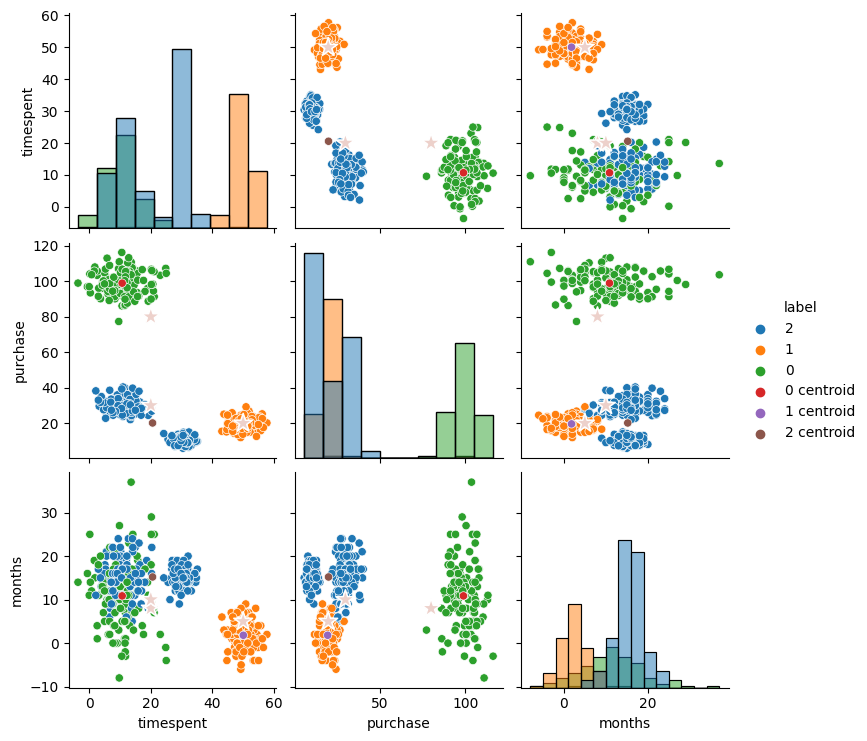

In [20]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/segments.csv')

centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
data_all = pd.concat([data, centroids], ignore_index=True)

pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
# Дополнительный слой для центроидов
# Сформируйте таблицу для дополнительного слоя
centroids_init = pd.DataFrame([[20, 80, 8], [50, 20, 5], [20, 30, 10]], columns=data.drop(columns=['label']).columns)
# Сформируйте "заглушку"
centroids_init['label'] = 4
pairgrid.data = centroids_init
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag');

### Появился перебежчик! Он поменял продвинутый сегмент на базовый. Особенно это заметно на прокции пары purchase и timespent.

### Теперь разница в значении целевой функции объяснима: алгоритм без начальных центроидов определил кластеры, внутрикластерное расстояние для которых минимально. А начальные центроиды эти кластеры сдвинули.

### 2) Обучите модель для четырёх кластеров. Центроиды укажите так: ['0 centroid', '1 centroid', '2 centroid', '3 centroid'].  Постройте диаграмму pairplot с полученными центроидами и заливкой для модели. При обучении примените параметр random_state=12345.

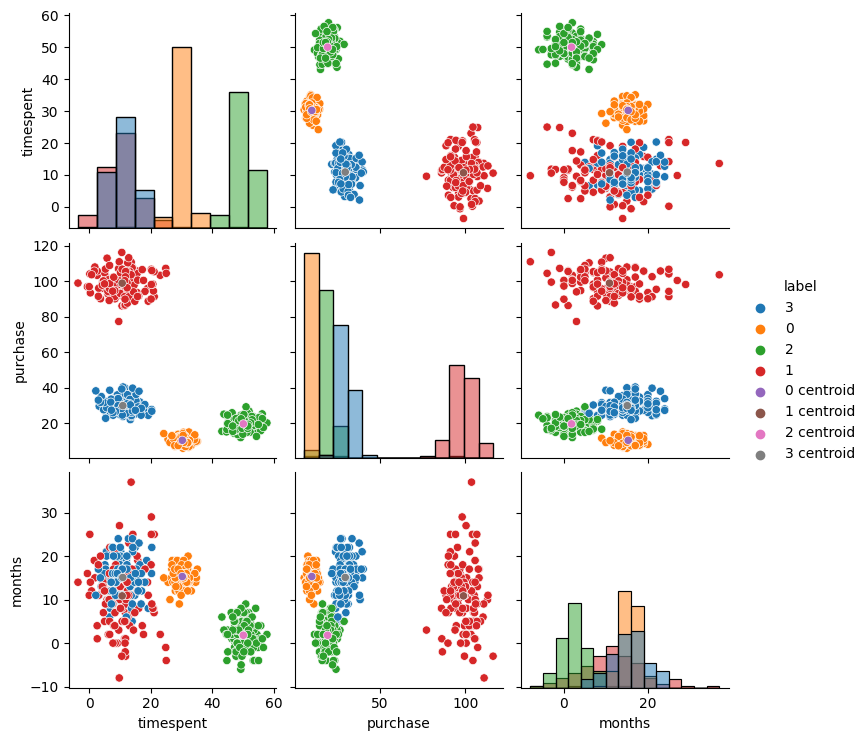

In [19]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/segments.csv')

# Обучение модели для 4-х кластеров
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
data_all = pd.concat([data, centroids], ignore_index=True)

# Построение графика
sns.pairplot(data_all, hue='label', diag_kind='hist');